# [DonorsChoose.org Application Screening](https://www.kaggle.com/c/donorschoose-application-screening)

 1. [Introduction](#Introduction) 
  * [Background](#Backgound)
  * [Problem Statement](#Problem-Statement)   
 2. [Preparations](#Preparations)

# Introduction


## Background

Founded in 2000 by a high school teacher in the Bronx, [DonorsChoose.org](www.donorschoose.org) empowers public school teachers from across the country to request much-needed materials and experiences for their students. At any given time, there are thousands of classroom requests that can be brought to life with a gift of any amount.

DonorsChoose.org receives hundreds of thousands of project proposals each year for classroom projects in need of funding. Right now, a large number of volunteers is needed to manually screen each submission before it's approved to be posted on the DonorsChoose.org website. 

I intend to apply Data Science skills to help NGO's connected to poverty alleviation that's why this project is of interest to me, we need a lot more than food to achieve a just and prosper society and education is an immensely important asset for this goal.

## Problem Statement

Next year, DonorsChoose.org expects to receive close to 500,000 project proposals. As a result, there are three main problems they need to solve:

1. How to scale current manual processes and resources to screen 500,000 projects so that they can be posted as quickly and as efficiently as possible
2. How to increase the consistency of project vetting across different volunteers to improve the experience for teachers
3. How to focus volunteer time on the applications that need the most assistance

The goal is to predict whether or not a DonorsChoose.org project proposal submitted by a teacher will be approved, using the text of project descriptions as well as additional metadata about the project, teacher, and school. DonorsChoose.org can then use this information to identify projects most likely to need further review before approval.
With an algorithm to pre-screen applications, DonorsChoose.org can auto-approve some applications quickly so that volunteers can spend their time on more nuanced and detailed project ​vetting processes, including doing more to help teachers develop projects that qualify for specific funding opportunities.
The machine learning algorithm can help more teachers get funded more quickly, and with less cost to DonorsChoose.org, allowing them to channel even more funding directly to classrooms across the country. 


# Preparations

In [ ]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import os

# To make output stable across runs
np.random.seed(42)

# To plot pretty figures
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

import plotly.offline as py
py.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.tools as tls

pd.options.mode.chained_assignment = None
pd.options.display.max_columns = 999

from IPython.display import display # Allows the use of display() for DataFrames

The following groups of cells is an adaptation from the quick-start guide provided by the Competition Organizers for a 
quick initial EDA and to set a benchmark.

Reference: https://www.kaggle.com/skleinfeld/getting-started-with-the-donorschoose-data-set/notebook

## About the DonorsChoose Data Set

The goal of the DonorsChoose competition is to build a model that can accurately predict whether a teacher's project proposal was accepted, based on the data they provided in their application. The `train.csv` data set provided by DonorsChoose contains the following features:

Feature | Description | Data Type
----------|---------------|------------
**`project_id`** | A unique identifier for the proposed project. **Example:** `p036502`   | string
**`project_title`**    | Title of the project. **Examples:**<br><ul><li><code>Art Will Make You Happy!</code></li><li><code>First Grade Fun</code></li></ul> | string
**`project_grade_category`** | Grade level of students for which the project is targeted. One of the following enumerated values: <br/><ul><li><code>Grades PreK-2</code></li><li><code>Grades 3-5</code></li><li><code>Grades 6-8</code></li><li><code>Grades 9-12</code></li></ul>  | string
 **`project_subject_categories`** | One or more (comma-separated) subject categories for the project from the following enumerated list of values:  <br/><ul><li><code>Applied Learning</code></li><li><code>Care &amp; Hunger</code></li><li><code>Health &amp; Sports</code></li><li><code>History &amp; Civics</code></li><li><code>Literacy &amp; Language</code></li><li><code>Math &amp; Science</code></li><li><code>Music &amp; The Arts</code></li><li><code>Special Needs</code></li><li><code>Warmth</code></li></ul><br/> **Examples:** <br/><ul><li><code>Music &amp; The Arts</code></li><li><code>Literacy &amp; Language, Math &amp; Science</code></li>  | string
  **`school_state`** | State where school is located ([Two-letter U.S. postal code](https://en.wikipedia.org/wiki/List_of_U.S._state_abbreviations#Postal_codes)). **Example:** `WY`| string
**`project_subject_subcategories`** | One or more (comma-separated) subject subcategories for the project. **Examples:** <br/><ul><li><code>Literacy</code></li><li><code>Literature &amp; Writing, Social Sciences</code></li></ul> | string
**`project_resource_summary`** | An explanation of the resources needed for the project. **Example:** <br/><ul><li><code>My students need hands on literacy materials to manage sensory needs!</code</li></ul> | string
**`project_essay_1`**    | First paragraph of application essay.<sup>*</sup>  | string
**`project_essay_2`**    | Second paragraph of application essay.<sup>*</sup> | string
**`project_essay_3`**    | Third paragraph of application essay.<sup>*</sup> | string
**`project_essay_4`**    | Fourth paragraph of application essay.<sup>*</sup> | string
**`project_submitted_datetime`** | Datetime when project application was submitted. **Example:** `2016-04-28 12:43:56.245`   | int64
**`teacher_id`** | A unique identifier for the teacher of the proposed project. **Example:** `bdf8baa8fedef6bfeec7ae4ff1c15c56`  | string
**`teacher_prefix`** | Teacher's title. One of the following enumerated values: <br/><ul><li><code>nan</code></li><li><code>Dr.</code></li><li><code>Mr.</code></li><li><code>Mrs.</code></li><li><code>Ms.</code></li><li><code>Teacher.</code></li></ul>  | string
**`teacher_number_of_previously_posted_projects`** | Number of project applications previously submitted by the same teacher. **Example:** `2` | int64

<sup>\*</sup> See **A Note on Essay Data** for some important details about changes to the application essay prompts in February 2010 that affect the values of `project_essay_1`, `project_essay_2`, `project_essay_3`, and `project_essay_4`.

Additionally, the `resources.csv` data set provides more data about the resources required for each project. Each line in this file represents a resource required by a project:

Feature | Description | Data Type
----------|---------------|------------
**`id`** | A `project_id` value from the `train.csv` file.  **Example:** `p036502`   | string
**`description`** | Desciption of the resource. **Example:** `Tenor Saxophone Reeds, Box of 25`   | string
**`quantity`** | Quantity of the resource required. **Example:** `3`   | string
**`price`** | Price of the resource required. **Example:** `9.95`   | string

**Note:** Many projects require multiple resources. The `id` value corresponds to a `project_id` in train.csv, so you use it as a key to retrieve all resources needed for a project:

The data set contains the following label (the value you will attempt to predict):

Label | Description | Data Type
----------|---------------|------------
`project_is_approved` | A binary flag indicating whether DonorsChoose approved the project. A value of `0` indicates the project was not approved, and a value of `1` indicates the project was approved. | int64

### A Note on Essay Data

Prior to February 18th, 2010, for their DonorsChoose application, teachers had the option of writing either a free-form essay (split into `project_essay_1`, `project_essay_2`, `project_essay_3`, and `project_essay_4`) or writing free-form answers to the following four prompts:

1. Introduce your classroom (`project_essay_1`)
2. Describe the situation (`project_essay_2`)
3. Describe the solution (`project_essay_3`)
4. Empower your donors (`project_essay_4`) 

Effective February 18th, 2010, the option to write a free-form essay was removed, and all teachers were required to respond to the following four prompts:

1. Open with the challenge facing your students (`project_essay_1`)
2. Tell us more about your students (`project_essay_2`)
3. Inspire your potential donors with an overview of the resources you're requesting (`project_essay_3`)
4. Close by sharing why your project is so important (`project_essay_4`) 

When using essay data from `project_essay_1`, `project_essay_2`, `project_essay_3`, and `project_essay_4`, make sure to take into account that the nature of the text content in these fields is different for examples with a `project_submitted_datetime` prior to February 18th, 2010.

### Load the Data

In [10]:
# Filepath to main training dataset.
path = 'data/'

# Read data and store in DataFrame.
train = pd.read_csv(path+'train.csv', sep=',')
test = pd.read_csv(path+'test.csv', sep=',')
resources = pd.read_csv(path+'resources.csv', sep=',')
sample_submit = pd.read_csv(path+'sample_submission.csv', sep=',')

/home/ronaldo/anaconda3/envs/fastai/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2728: DtypeWarning:

Columns (11,12) have mixed types. Specify dtype option on import or set low_memory=False.



FileNotFoundError: File b'data/sample_submission.csv' does not exist

List all the fields in the data set:

In [3]:
print(train_data.columns)

Index(['id', 'teacher_id', 'teacher_prefix', 'school_state',
       'project_submitted_datetime', 'project_grade_category',
       'project_subject_categories', 'project_subject_subcategories',
       'project_title', 'project_essay_1', 'project_essay_2',
       'project_essay_3', 'project_essay_4', 'project_resource_summary',
       'teacher_number_of_previously_posted_projects', 'project_is_approved'],
      dtype='object')


Retrieve the first three examples:

In [4]:
train_data.head()

,id,teacher_id,teacher_prefix,school_state,project_submitted_datetime,project_grade_category,project_subject_categories,project_subject_subcategories,project_title,project_essay_1,project_essay_2,project_essay_3,project_essay_4,project_resource_summary,teacher_number_of_previously_posted_projects,project_is_approved
0,p036502,484aaf11257089a66cfedc9461c6bd0a,Ms.,NV,2016-11-18 14:45:59,Grades PreK-2,Literacy & Language,Literacy,Super Sight Word Centers,Most of my kindergarten students come from low...,I currently have a differentiated sight word c...,NaN,NaN,My students need 6 Ipod Nano's to create and d...,26,1
1,p039565,df72a3ba8089423fa8a94be88060f6ed,Mrs.,GA,2017-04-26 15:57:28,Grades 3-5,"Music & The Arts, Health & Sports","Performing Arts, Team Sports",Keep Calm and Dance On,Our elementary school is a culturally rich sch...,We strive to provide our diverse population of...,NaN,NaN,My students need matching shirts to wear for d...,1,0
2,p233823,a9b876a9252e08a55e3d894150f75ba3,Ms.,UT,2017-01-01 22:57:44,Grades 3-5,"Math & Science, Literacy & Language","Applied Sciences, Literature & Writing",Lets 3Doodle to Learn,Hello;\r\nMy name is Mrs. Brotherton. I teach ...,We are looking to add some 3Doodler to our cla...,NaN,NaN,My students need the 3doodler. We are an SEM s...,5,1
3,p185307,525fdbb6ec7f538a48beebaa0a51b24f,Mr.,NC,2016-08-12 15:42:11,Grades 3-5,Health & Sports,Health & Wellness,"\""Kid Inspired\"" Equipment to Increase Activit...",My students are the greatest students but are ...,"The student's project which is totally \""kid-i...",NaN,NaN,My students need balls and other activity equi...,16,0
4,p013780,a63b5547a7239eae4c1872670848e61a,Mr.,CA,2016-08-06 09:09:11,Grades 6-8,Health & Sports,Health & Wellness,We need clean water for our culinary arts class!,My students are athletes and students who are ...,For some reason in our kitchen the water comes...,NaN,NaN,My students need a water filtration system for...,42,1


Let's take a closer look at our one numeric feature, `teacher_number_of_previously_posted_projects`. Print some key stats using the  `describe()` method:

In [9]:
# Describe data set and retrieve data for teacher_number_of_previously_posted_projects
train_data.describe()["teacher_number_of_previously_posted_projects"]

count    182080.000000
mean         11.237055
std          28.016086
min           0.000000
25%           0.000000
50%           2.000000
75%           9.000000
max         451.000000
Name: teacher_number_of_previously_posted_projects, dtype: float64

We can see that the minimum number of previously posted projects for a teacher is 0, the maximum number is 451, and the mean (average) number is 11.23. Let's visualize the distribution using a histogram, to get a better sense of the spread.

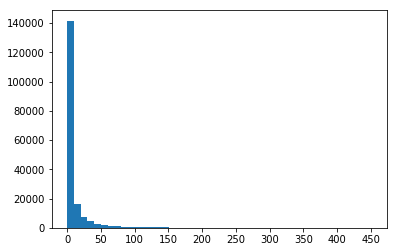

In [7]:
# Plot histogram with 45 bins; each bin representing a range of 10
plt.hist(train_data["teacher_number_of_previously_posted_projects"], bins=45)
plt.xticks(range(0, 500, 50))
plt.show()

We can see that the vast majority of examples have a `teacher_number_previously_posted_projects` value between 0 and 10, with a sharp dropoff thereafter. However, if we rebucket our data into two bins (&lt; 10 and &ge; 10), we can see that there's a substantial long tail of examples with previously-posted-project values greater than 10:

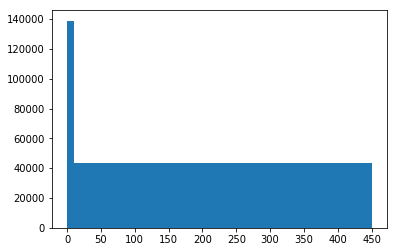

In [8]:
# Plot histogram with 45 bins; each bin representing a range of 10
plt.hist(train_data["teacher_number_of_previously_posted_projects"], bins=[0, 10, 450])
plt.xticks(range(0, 500, 50))
plt.show()

## Submitting a Kaggle Entry

Once you're satisfied with your model performance, you can make predictions on the test set as follows (this may take a few minutes to run):

In [ ]:
# Filepath to main test dataset.
test_file_path = '../input/test.csv'

# Read data and store in DataFrame.
test_data = pd.read_csv(test_file_path, sep=',')

my_feature_name = 'teacher_number_of_previously_posted_projects'

# Get test features
test_examples = test_data[[my_feature_name]].copy()

# No labels in data set, so generate some placeholder values
placeholder_label_vals = [0 for i in range(0, 78035)]
test_labels = pd.DataFrame({"project_is_approved": placeholder_label_vals})

predict_test_input_fn = lambda: my_input_fn(test_examples,
                                            test_labels, # unused for prediction
                                            num_epochs=1, 
                                            shuffle=False)

# Make predictions
predictions_generator = linear_classifier.predict(input_fn=predict_test_input_fn)
predictions_list = list(predictions_generator)

# Extract probabilities
probabilities = [p["probabilities"][1] for p in predictions_list]
print("Done extracting probabilities")

We want to format our submission as a CSV with two fields for each example: `id` and our prediction for `project_is_approved`, e.g.:

```
id,project_is_approved
p233245,0.54
p096795,0.14
p236235,0.94
```

Run the following code to create a `DataFrame` in the required format:

In [ ]:
my_submission = pd.DataFrame({'id': test_data["id"], 'project_is_approved': probabilities})
print(my_submission.values)

Then write your output to CSV:

In [ ]:
my_submission.to_csv('my_submission.csv', index=False)

Next, click the **Commit & Run** button to execute the entire Kaggle kernel. This will take ~10 minutes to run. 

When it's finished, you'll see the navigation bar at the top of your screen has an **Output** tab. Click on the **Output** tab, and click on the **Submit to Competition** button to submit to Kaggle.